# Part A

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn 
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import *
import random 
from tqdm import tqdm 
import warnings 

In [2]:
def imshow(img):
  img = img / 2 + 0.5   # unnormalize
  npimg = img.numpy()   # convert from tensor
  plt.imshow(np.transpose(npimg, (1, 2, 0))) 
  plt.show()

Files already downloaded and verified
Files already downloaded and verified


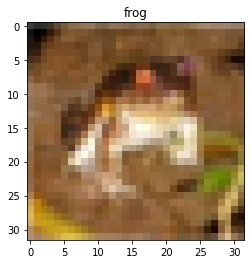

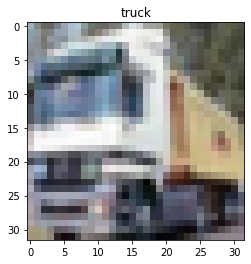

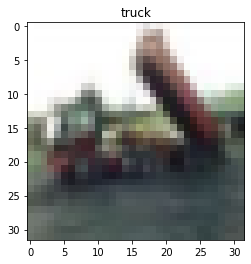

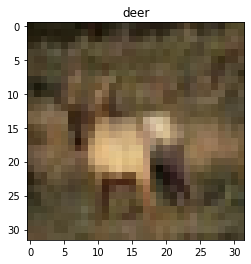

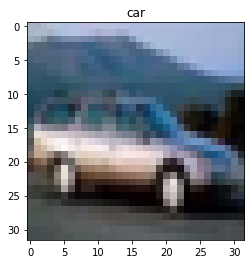

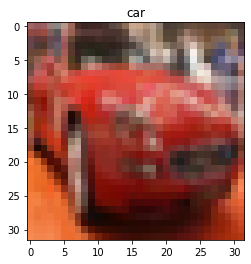

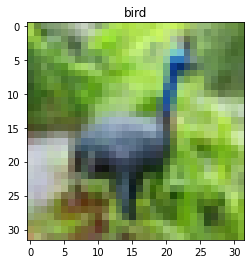

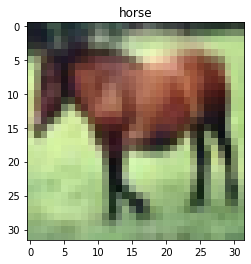

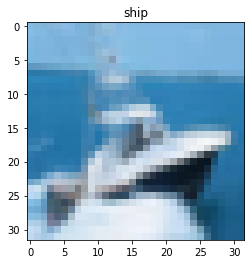

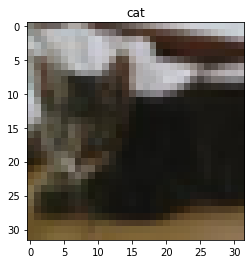

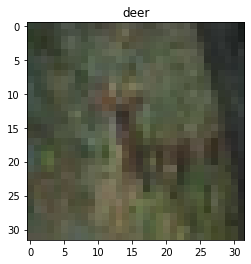

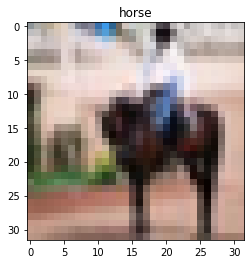

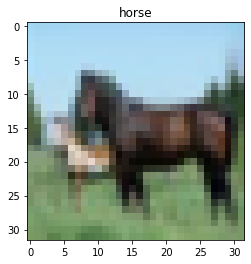

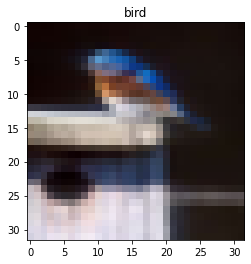

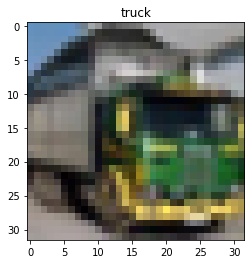

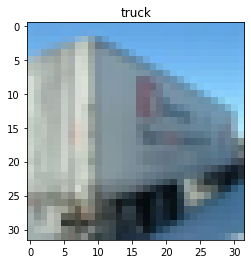

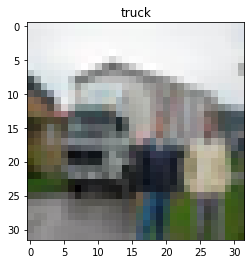

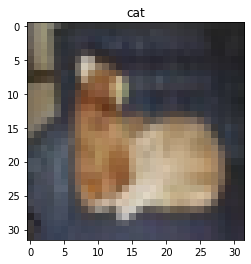

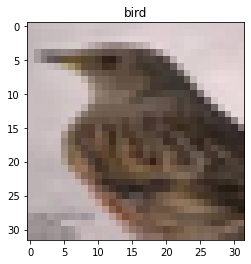

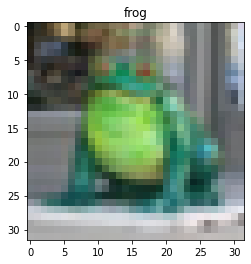

In [3]:

# The below two lines are optional and are just there to avoid any SSL
# related errors while downloading the CIFAR-10 dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#Initializing normalizing transform for the dataset
normalize_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean = (0.5, 0.5, 0.5),
                                    std = (0.5, 0.5, 0.5))])

#Downloading the CIFAR10 dataset into train and test sets
train_dataset = torchvision.datasets.CIFAR10(
    root="./CIFAR10/train", train=True,
    transform=normalize_transform,
    download=True)
    
test_dataset = torchvision.datasets.CIFAR10(
    root="./CIFAR10/test", train=False,
    transform=normalize_transform,
    download=True)


#Generating data loaders from the corresponding datasets
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)




classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog',
'frog', 'horse', 'ship', 'truck')

# get first 100 training images
dataiter = iter(train_loader)
imgs, lbls = dataiter.next()

for i in range(20):  
    plt.title(classes[lbls[i]])
    imshow(imgs[i])

In [4]:
# check pytorch cuda and use cuda if possible
device = torch.cuda.is_available()
print('*' * 50)
if torch.cuda.is_available():  
  print('CUDA is found! Tranining on %s.......'%torch.cuda.get_device_name(0))
else:
  warnings.warn('CUDA not found! Training may be slow......')

**************************************************
CUDA is found! Tranining on Tesla T4.......


In [5]:
class CNNModel(nn.Module):
  def __init__(self):
    super(CNNModel, self).__init__()
    # TODO: Create CNNModel using 2D convolution. You should vary the number of convolution layers and fully connected layers
    # In this function, you should define each of the individual components of the CNN that you will use in your network 
    # Example:  

    self.cnn1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5, stride = 1, padding = 0)
    self.relu1 = nn.ReLU() 
    self.cnn2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 3, stride = 1, padding = 0)
    self.relu2 = nn.ReLU()
    self.cnn3 = nn.Conv2d(in_channels = 16, out_channels = 24, kernel_size = 3, stride = 1, padding = 0)
    self.relu3 = nn.ReLU() 
    self.fc1=nn.Linear(24**3, 120)
    self.relu4=nn.ReLU()
    self.fc2=nn.Linear(120,84)
    self.relu5=nn.ReLU()
    self.fc3=nn.Linear(84,10) 
    
    # TODO: Create Fully connected layers. You should calculate the dimension of the input tensor from the previous layer 
    # Example: 

    # self.fc1 = nn.Linear(25088, 1)

  def forward(self,x):

    # TODO: Perform forward pass in below section 
    # In this function, you will apply the components defined earlier to the input, x.
    # Example:

    out = self.cnn1(x)
    out = self.relu1(out)
    out = self.cnn2(out)
    out = self.relu2(out)
    out = self.cnn3(out)
    out = self.relu3(out)
    out = out.view(out.size(0), -1)
    out = self.fc1(out)
    out= self.relu4(out)
    out = self.fc2(out)
    out= self.relu5(out)
    out = self.fc3(out)

    # out = self.maxpool1(out) 
    # to visualize feature map in part a, part b.i), use the following three lines:
  
    # plt.imshow(out[0][0].cpu().detach().numpy())
    # plt.show()
    # plt.close('all')
    # # out = out.view(out.size(0), -1)
    # out = self.fc3(out)
    return out

In [6]:
# Create CNN
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CNNModel()
model.to(device)

# TODO: define Cross Entropy Loss 
err = nn.CrossEntropyLoss()

# TODO: create Adam Optimizer and define your hyperparameters 
num_epoch = 20
batch_size = 100
learn_rate = 0.001

optimizer = torch.optim.Adam(model.parameters(), lr = learn_rate)

In [7]:
from torchsummary import summary
print(summary(model, input_size = (3, 32, 32), batch_size = -1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
              ReLU-2            [-1, 6, 28, 28]               0
            Conv2d-3           [-1, 16, 26, 26]             880
              ReLU-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 24, 24, 24]           3,480
              ReLU-6           [-1, 24, 24, 24]               0
            Linear-7                  [-1, 120]       1,659,000
              ReLU-8                  [-1, 120]               0
            Linear-9                   [-1, 84]          10,164
             ReLU-10                   [-1, 84]               0
           Linear-11                   [-1, 10]             850
Total params: 1,674,830
Trainable params: 1,674,830
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forw

In [8]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in tqdm(range(num_epoch)):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # TODO: Forward propagation
        outputs = model(images)
        # outputs = torch.reshape(outputs, (len(outputs),))
        # labels = labels.float()
        
        # TODO: Calculate softmax and cross entropy loss
        loss = err(outputs, labels)
        
        # Backprop agate your Loss 
        loss.backward()
        
        # Update CNN model  
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            model.eval()
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                
                # Forward propagation
                outputs = model(images)
                
                # Get predictions from the maximum value
                predicted = torch.argmax(outputs,1)
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.item())
            iteration_list.append(count)
            accuracy_list.append(accuracy.item())
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

  5%|▌         | 1/20 [00:28<09:03, 28.58s/it]

Iteration: 500  Loss: 1.3503135442733765  Accuracy: 52.0099983215332 %


 10%|█         | 2/20 [00:54<08:07, 27.11s/it]

Iteration: 1000  Loss: 1.2075603008270264  Accuracy: 58.25 %


 15%|█▌        | 3/20 [01:21<07:35, 26.80s/it]

Iteration: 1500  Loss: 0.8363688588142395  Accuracy: 61.16999816894531 %


 25%|██▌       | 5/20 [02:14<06:38, 26.58s/it]

Iteration: 2000  Loss: 0.8027502298355103  Accuracy: 62.619998931884766 %


 30%|███       | 6/20 [02:38<06:00, 25.76s/it]

Iteration: 2500  Loss: 0.7202792763710022  Accuracy: 61.71999740600586 %


 35%|███▌      | 7/20 [03:04<05:36, 25.92s/it]

Iteration: 3000  Loss: 0.943752110004425  Accuracy: 59.769996643066406 %


 40%|████      | 8/20 [03:31<05:13, 26.09s/it]

Iteration: 3500  Loss: 0.5243631601333618  Accuracy: 58.459999084472656 %


 50%|█████     | 10/20 [04:29<04:40, 28.06s/it]

Iteration: 4000  Loss: 0.448903888463974  Accuracy: 58.38999938964844 %


 55%|█████▌    | 11/20 [04:57<04:10, 27.83s/it]

Iteration: 4500  Loss: 0.4821668565273285  Accuracy: 56.029998779296875 %


 60%|██████    | 12/20 [05:22<03:36, 27.09s/it]

Iteration: 5000  Loss: 0.3718538284301758  Accuracy: 57.94999694824219 %


 70%|███████   | 14/20 [06:16<02:42, 27.11s/it]

Iteration: 5500  Loss: 0.4407530725002289  Accuracy: 55.939998626708984 %


 75%|███████▌  | 15/20 [06:43<02:14, 26.84s/it]

Iteration: 6000  Loss: 0.14374108612537384  Accuracy: 54.55999755859375 %


 80%|████████  | 16/20 [07:09<01:46, 26.64s/it]

Iteration: 6500  Loss: 0.33439338207244873  Accuracy: 55.57999801635742 %


 85%|████████▌ | 17/20 [07:34<01:18, 26.11s/it]

Iteration: 7000  Loss: 0.08321602642536163  Accuracy: 56.8599967956543 %


 95%|█████████▌| 19/20 [08:29<00:26, 26.90s/it]

Iteration: 7500  Loss: 0.08006451278924942  Accuracy: 56.7599983215332 %


100%|██████████| 20/20 [08:56<00:00, 26.83s/it]


In [9]:
from torchsummary import summary
print(summary(model, input_size = (3, 32, 32), batch_size = -1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
              ReLU-2            [-1, 6, 28, 28]               0
            Conv2d-3           [-1, 16, 26, 26]             880
              ReLU-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 24, 24, 24]           3,480
              ReLU-6           [-1, 24, 24, 24]               0
            Linear-7                  [-1, 120]       1,659,000
              ReLU-8                  [-1, 120]               0
            Linear-9                   [-1, 84]          10,164
             ReLU-10                   [-1, 84]               0
           Linear-11                   [-1, 10]             850
Total params: 1,674,830
Trainable params: 1,674,830
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forw

The memory required is 6.85 MB and most of the space is occupied by the parameters. The learning parameters are large and thus down sampling needs to be done to reduce the parameters to be learned. 

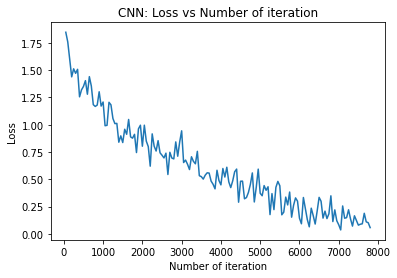

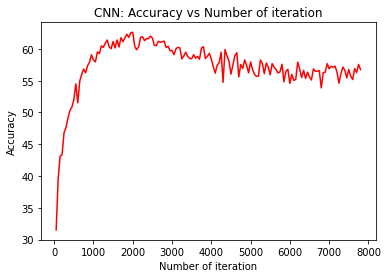

In [10]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

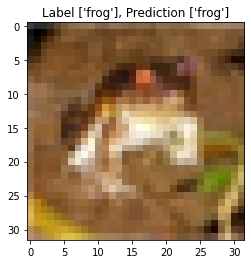

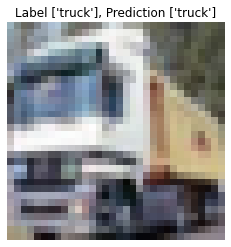

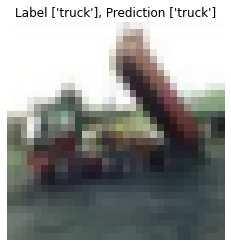

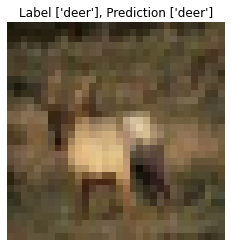

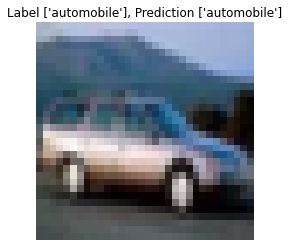

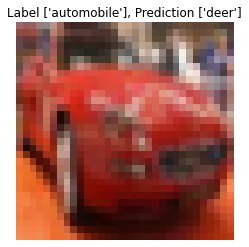

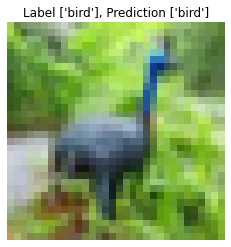

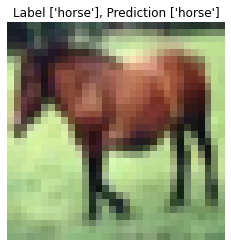

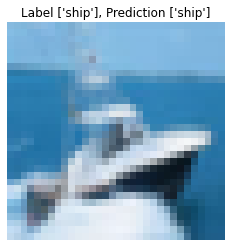

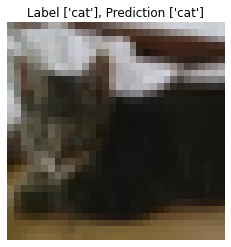

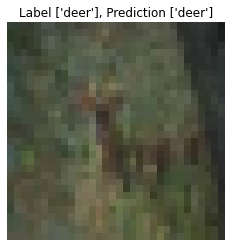

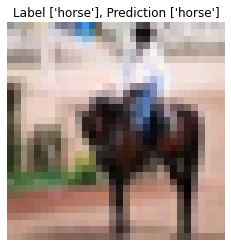

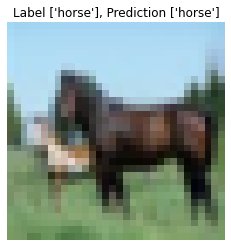

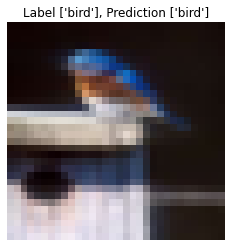

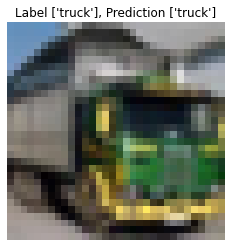

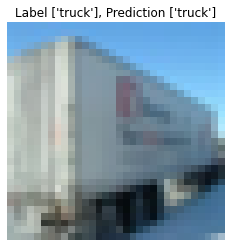

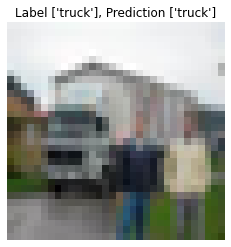

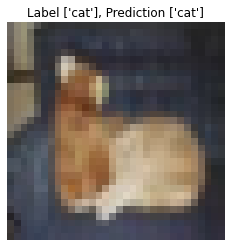

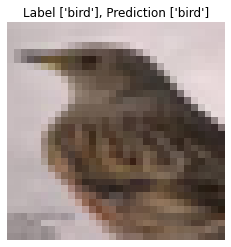

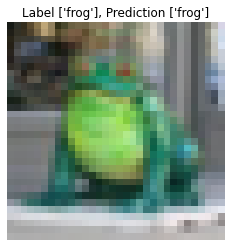

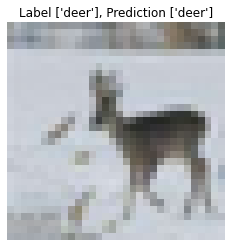

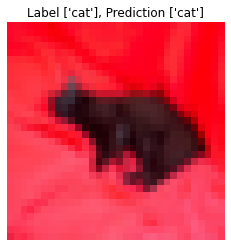

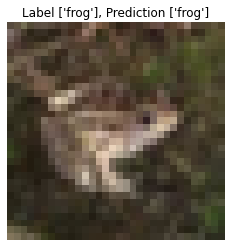

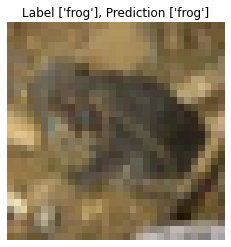

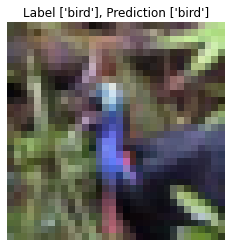

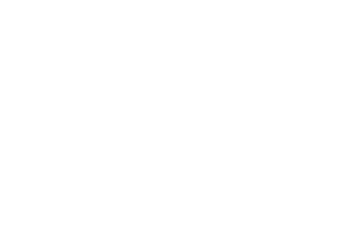

In [11]:
#To-do: evaluate on test set, instead of training set
random_image = random.randint(0,len(train_dataset))
image = train_dataset.__getitem__(random_image)
model.eval()
images, labels = next(iter(train_loader))
images, labels = images.to(device), labels.to(device)
predictions = torch.argmax(model(images),1)
num_cols=1
num_rows = 25# len(labels)
label_map = [['airplane'],['automobile'],['bird'],['cat'], ['deer'], ['dog'], ['frog'], ['horse'], ['ship'], ['truck']]

for idx in range(num_rows):
  img = images.cpu()[idx]
  
  plt.title(f"Label {label_map[labels[idx]]}, Prediction {label_map[predictions[idx]]}")  
  imshow(img)

  plt.axis('off')
plt.show()

# Part B1

In [12]:
class CNNModel(nn.Module):
  def __init__(self):
    super(CNNModel, self).__init__()
    # TODO: Create CNNModel using 2D convolution. You should vary the number of convolution layers and fully connected layers
    # In this function, you should define each of the individual components of the CNN that you will use in your network 
    # Example:  

    self.cnn1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5, stride = 1, padding = 0)
    self.relu1 = nn.ReLU() 
    self.cnn2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 3, stride = 1, padding = 0)
    self.relu2 = nn.ReLU()
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)
    self.cnn3 = nn.Conv2d(in_channels = 16, out_channels = 24, kernel_size = 3, stride = 1, padding = 0)
    self.relu3 = nn.ReLU() 
    self.fc1=nn.Linear(24*11*11, 120)
    self.relu4=nn.ReLU()
    self.fc2=nn.Linear(120,84)
    self.relu5=nn.ReLU()
    self.fc3=nn.Linear(84,10)

         
    
    # TODO: Create Fully connected layers. You should calculate the dimension of the input tensor from the previous layer 


  def forward(self,x):

    # TODO: Perform forward pass in below section 
    # In this function, you will apply the components defined earlier to the input, x.
    # Example:

    out = self.cnn1(x)
    out = self.relu1(out)
    out = self.cnn2(out)
    # out = self.relu2(out)
    out=self.maxpool1(out)
    out = self.cnn3(out)
    out = self.relu3(out)
    out = out.view(out.size(0), -1)
    out = self.fc1(out)
    out= self.relu4(out)
    out = self.fc2(out)
    out= self.relu5(out)
    out = self.fc3(out)

    # out = self.maxpool1(out) 
    # to visualize feature map in part a, part b.i), use the following three lines:
  
    # plt.imshow(out[0][0].cpu().detach().numpy())
    # plt.show()
    # plt.close('all')
    # out = out.view(out.size(0), -1)
    # out = self.fc3(out)
    return out

In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CNNModel()
model.to(device)

# TODO: define Cross Entropy Loss 
err = nn.CrossEntropyLoss()

# TODO: create Adam Optimizer and define your hyperparameters 
num_epoch = 20
batch_size = 100
learn_rate = 0.001

optimizer = torch.optim.Adam(model.parameters(), lr = learn_rate)

In [14]:
from torchsummary import summary
print(summary(model, input_size = (3, 32, 32), batch_size = -1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
              ReLU-2            [-1, 6, 28, 28]               0
            Conv2d-3           [-1, 16, 26, 26]             880
         MaxPool2d-4           [-1, 16, 13, 13]               0
            Conv2d-5           [-1, 24, 11, 11]           3,480
              ReLU-6           [-1, 24, 11, 11]               0
            Linear-7                  [-1, 120]         348,600
              ReLU-8                  [-1, 120]               0
            Linear-9                   [-1, 84]          10,164
             ReLU-10                   [-1, 84]               0
           Linear-11                   [-1, 10]             850
Total params: 364,430
Trainable params: 364,430
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/

We see that the memory required in this model is 1.62 MB which is way lesser than the memory required in the model which did not have the max pooling layer, hence we can say that the model requires lesser space due to the down sampling of the features. 

In [15]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in tqdm(range(num_epoch)):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # TODO: Forward propagation
        outputs = model(images)
        # outputs = torch.reshape(outputs, (len(outputs),))
        # labels = labels.float()
        
        # TODO: Calculate softmax and cross entropy loss
        loss = err(outputs, labels)
        
        # Backprop agate your Loss 
        loss.backward()
        
        # Update CNN model  
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            model.eval()
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                
                # Forward propagation
                outputs = model(images)
                
                # Get predictions from the maximum value
                predicted = torch.argmax(outputs,1)
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.item())
            iteration_list.append(count)
            accuracy_list.append(accuracy.item())
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

  5%|▌         | 1/20 [00:24<07:53, 24.92s/it]

Iteration: 500  Loss: 1.3278088569641113  Accuracy: 51.06999969482422 %


 10%|█         | 2/20 [00:51<07:48, 26.04s/it]

Iteration: 1000  Loss: 1.2284011840820312  Accuracy: 55.79999923706055 %


 15%|█▌        | 3/20 [01:18<07:26, 26.24s/it]

Iteration: 1500  Loss: 0.904192328453064  Accuracy: 59.19999694824219 %


 25%|██▌       | 5/20 [02:10<06:34, 26.30s/it]

Iteration: 2000  Loss: 0.9444490671157837  Accuracy: 59.73999786376953 %


 30%|███       | 6/20 [02:35<05:58, 25.59s/it]

Iteration: 2500  Loss: 0.8330974578857422  Accuracy: 62.2599983215332 %


 35%|███▌      | 7/20 [03:01<05:34, 25.76s/it]

Iteration: 3000  Loss: 0.9561042785644531  Accuracy: 61.939998626708984 %


 40%|████      | 8/20 [03:27<05:09, 25.78s/it]

Iteration: 3500  Loss: 0.57266765832901  Accuracy: 62.1099967956543 %


 50%|█████     | 10/20 [04:18<04:18, 25.87s/it]

Iteration: 4000  Loss: 0.6977255940437317  Accuracy: 59.89999771118164 %


 55%|█████▌    | 11/20 [04:44<03:52, 25.80s/it]

Iteration: 4500  Loss: 0.6497976183891296  Accuracy: 59.66999816894531 %


 60%|██████    | 12/20 [05:08<03:21, 25.19s/it]

Iteration: 5000  Loss: 0.5881167054176331  Accuracy: 60.56999969482422 %


 70%|███████   | 14/20 [05:59<02:32, 25.41s/it]

Iteration: 5500  Loss: 0.43251705169677734  Accuracy: 59.39999771118164 %


 75%|███████▌  | 15/20 [06:25<02:07, 25.47s/it]

Iteration: 6000  Loss: 0.4431478679180145  Accuracy: 58.2599983215332 %


 80%|████████  | 16/20 [06:50<01:41, 25.43s/it]

Iteration: 6500  Loss: 0.422107458114624  Accuracy: 59.769996643066406 %


 85%|████████▌ | 17/20 [07:14<01:14, 24.92s/it]

Iteration: 7000  Loss: 0.43886691331863403  Accuracy: 59.84000015258789 %


 95%|█████████▌| 19/20 [08:05<00:25, 25.24s/it]

Iteration: 7500  Loss: 0.47855812311172485  Accuracy: 58.44999694824219 %


100%|██████████| 20/20 [08:30<00:00, 25.54s/it]


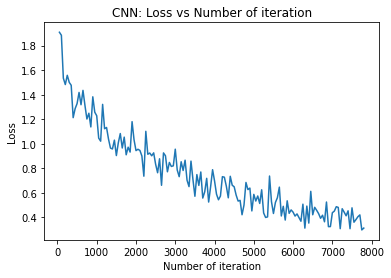

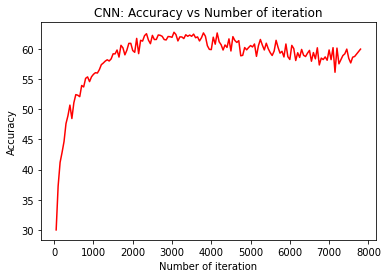

In [16]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

### Part B2

In [17]:
class CNNModel(nn.Module):
  def __init__(self):
    super(CNNModel, self).__init__()
    # TODO: Create CNNModel using 2D convolution. You should vary the number of convolution layers and fully connected layers
    # In this function, you should define each of the individual components of the CNN that you will use in your network 
    # Example:  

    self.cnn1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5, stride = 1, padding = 0)
    self.relu1 = nn.ReLU() 
    self.cnn2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 3, stride = 1, padding = 0)
    self.relu2 = nn.ReLU()
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)
    self.cnn3 = nn.Conv2d(in_channels = 16, out_channels = 24, kernel_size = 3, stride = 1, padding = 0)
    self.relu3 = nn.ReLU() 
    self.cnn4 = nn.Conv2d(in_channels = 24, out_channels = 24, kernel_size = 3, stride = 1, padding = 0)
    self.relu4 = nn.ReLU() 
    self.cnn5 = nn.Conv2d(in_channels = 24, out_channels = 24, kernel_size = 3, stride = 1, padding = 0)
    self.relu5 = nn.ReLU() 
    self.fc1=nn.Linear(24*7*7, 120)
    self.relu4=nn.ReLU()
    self.fc2=nn.Linear(120,84)
    self.relu5=nn.ReLU()
    self.fc3=nn.Linear(84,10)

         
    
    # TODO: Create Fully connected layers. You should calculate the dimension of the input tensor from the previous layer 


  def forward(self,x):

    # TODO: Perform forward pass in below section 
    # In this function, you will apply the components defined earlier to the input, x.
    # Example:

    out = self.cnn1(x)
    out = self.relu1(out)
    out = self.cnn2(out)
    out=self.maxpool1(out)
    out = self.cnn3(out)
    out = self.relu3(out)
    out = self.cnn4(out)
    out = self.relu4(out)
    out = self.cnn5(out)
    out = self.relu5(out)
    out = out.view(out.size(0), -1)
    out = self.fc1(out)
    out= self.relu4(out)
    out = self.fc2(out)
    out= self.relu5(out)
    out = self.fc3(out)

    # out = self.maxpool1(out) 
    # to visualize feature map in part a, part b.i), use the following three lines:
  
    # plt.imshow(out[0][0].cpu().detach().numpy())
    # plt.show()
    # plt.close('all')
    # out = out.view(out.size(0), -1)
    # out = self.fc3(out)
    return out

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CNNModel()
model.to(device)

# TODO: define Cross Entropy Loss 
err = nn.CrossEntropyLoss()

# TODO: create Adam Optimizer and define your hyperparameters 
num_epoch = 20
batch_size = 100
learn_rate = 0.001

optimizer = torch.optim.Adam(model.parameters(), lr = learn_rate)

In [19]:
from torchsummary import summary
print(summary(model, input_size = (3, 32, 32), batch_size = -1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
              ReLU-2            [-1, 6, 28, 28]               0
            Conv2d-3           [-1, 16, 26, 26]             880
         MaxPool2d-4           [-1, 16, 13, 13]               0
            Conv2d-5           [-1, 24, 11, 11]           3,480
              ReLU-6           [-1, 24, 11, 11]               0
            Conv2d-7             [-1, 24, 9, 9]           5,208
              ReLU-8             [-1, 24, 9, 9]               0
            Conv2d-9             [-1, 24, 7, 7]           5,208
             ReLU-10             [-1, 24, 7, 7]               0
           Linear-11                  [-1, 120]         141,240
             ReLU-12                  [-1, 120]               0
           Linear-13                   [-1, 84]          10,164
             ReLU-14                   

Here the number parameters are even more reduced with the convolution layers added which makes the model require lesser memory space. 

In [20]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in tqdm(range(num_epoch)):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # TODO: Forward propagation
        outputs = model(images)
        # outputs = torch.reshape(outputs, (len(outputs),))
        # labels = labels.float()
        
        # TODO: Calculate softmax and cross entropy loss
        loss = err(outputs, labels)
        
        # Backprop agate your Loss 
        loss.backward()
        
        # Update CNN model  
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            model.eval()
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                
                # Forward propagation
                outputs = model(images)
                
                # Get predictions from the maximum value
                predicted = torch.argmax(outputs,1)
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.item())
            iteration_list.append(count)
            accuracy_list.append(accuracy.item())
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

  5%|▌         | 1/20 [00:24<07:40, 24.23s/it]

Iteration: 500  Loss: 1.482846975326538  Accuracy: 41.48999786376953 %


 10%|█         | 2/20 [00:50<07:34, 25.28s/it]

Iteration: 1000  Loss: 1.3694086074829102  Accuracy: 47.89999771118164 %


 15%|█▌        | 3/20 [01:16<07:16, 25.70s/it]

Iteration: 1500  Loss: 1.2216817140579224  Accuracy: 54.27000045776367 %


 25%|██▌       | 5/20 [02:08<06:29, 25.97s/it]

Iteration: 2000  Loss: 1.1017919778823853  Accuracy: 55.48999786376953 %


 30%|███       | 6/20 [02:33<05:55, 25.41s/it]

Iteration: 2500  Loss: 1.179496169090271  Accuracy: 57.2599983215332 %


 35%|███▌      | 7/20 [02:59<05:34, 25.71s/it]

Iteration: 3000  Loss: 1.31187105178833  Accuracy: 58.5 %


 40%|████      | 8/20 [03:25<05:10, 25.89s/it]

Iteration: 3500  Loss: 0.9461766481399536  Accuracy: 59.2599983215332 %


 50%|█████     | 10/20 [04:17<04:20, 26.01s/it]

Iteration: 4000  Loss: 0.9811628460884094  Accuracy: 59.78999710083008 %


 55%|█████▌    | 11/20 [04:44<03:54, 26.06s/it]

Iteration: 4500  Loss: 1.0567433834075928  Accuracy: 60.7599983215332 %


 60%|██████    | 12/20 [05:08<03:23, 25.45s/it]

Iteration: 5000  Loss: 0.9902478456497192  Accuracy: 61.66999816894531 %


 70%|███████   | 14/20 [06:00<02:35, 25.93s/it]

Iteration: 5500  Loss: 0.9286423325538635  Accuracy: 61.75 %


 75%|███████▌  | 15/20 [06:27<02:10, 26.13s/it]

Iteration: 6000  Loss: 0.695203959941864  Accuracy: 62.30999755859375 %


 80%|████████  | 16/20 [06:53<01:44, 26.19s/it]

Iteration: 6500  Loss: 0.841987133026123  Accuracy: 62.13999938964844 %


 85%|████████▌ | 17/20 [07:18<01:17, 25.69s/it]

Iteration: 7000  Loss: 0.692039430141449  Accuracy: 63.619998931884766 %


 95%|█████████▌| 19/20 [08:10<00:25, 25.93s/it]

Iteration: 7500  Loss: 0.9076175689697266  Accuracy: 61.65999984741211 %


100%|██████████| 20/20 [08:37<00:00, 25.86s/it]


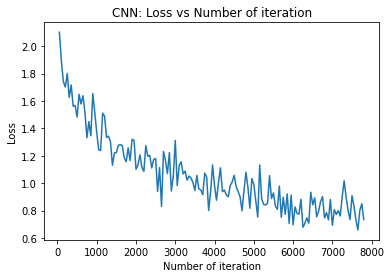

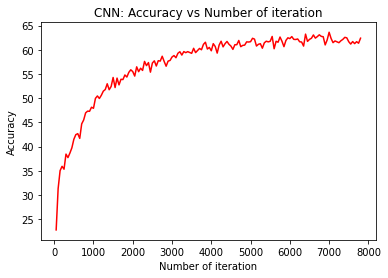

In [21]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

### Part B3

In [22]:
class CNNModel(nn.Module):
  def __init__(self):
    super(CNNModel, self).__init__()
    # TODO: Create CNNModel using 2D convolution. You should vary the number of convolution layers and fully connected layers
    # In this function, you should define each of the individual components of the CNN that you will use in your network 
    # Example:  

    self.cnn1 = nn.Conv2d(in_channels = 3, out_channels = 6*4, kernel_size = 5, stride = 1, padding = 0)
    self.relu1 = nn.ReLU() 
    self.cnn2 = nn.Conv2d(in_channels = 6*4, out_channels = 16*4, kernel_size = 3, stride = 1, padding = 0)
    self.relu2 = nn.ReLU()
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)
    self.cnn3 = nn.Conv2d(in_channels = 16*4, out_channels = 24*4, kernel_size = 3, stride = 1, padding = 0)
    self.relu3 = nn.ReLU() 
    self.cnn4 = nn.Conv2d(in_channels = 24*4, out_channels = 24*4, kernel_size = 3, stride = 1, padding = 0)
    self.relu4 = nn.ReLU() 
    self.cnn5 = nn.Conv2d(in_channels = 24*4, out_channels = 24*4, kernel_size = 3, stride = 1, padding = 0)
    self.relu5 = nn.ReLU() 
    self.fc1=nn.Linear(24*7*7*4, 120)
    self.relu4=nn.ReLU()
    self.fc2=nn.Linear(120,84)
    self.relu5=nn.ReLU()
    self.fc3=nn.Linear(84,10)

         
    
    # TODO: Create Fully connected layers. You should calculate the dimension of the input tensor from the previous layer 


  def forward(self,x):

    # TODO: Perform forward pass in below section 
    # In this function, you will apply the components defined earlier to the input, x.
    # Example:

    out = self.cnn1(x)
    out = self.relu1(out)
    out = self.cnn2(out)
    out=self.maxpool1(out)
    out = self.cnn3(out)
    out = self.relu3(out)
    out = self.cnn4(out)
    out = self.relu4(out)
    out = self.cnn5(out)
    out = self.relu5(out)
    out = out.view(out.size(0), -1)
    out = self.fc1(out)
    out= self.relu4(out)
    out = self.fc2(out)
    out= self.relu5(out)
    out = self.fc3(out)

    # out = self.maxpool1(out) 
    # to visualize feature map in part a, part b.i), use the following three lines:
  
    # plt.imshow(out[0][0].cpu().detach().numpy())
    # plt.show()
    # plt.close('all')
    # out = out.view(out.size(0), -1)
    # out = self.fc3(out)
    return out

In [23]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CNNModel()
model.to(device)

# TODO: define Cross Entropy Loss 
err = nn.CrossEntropyLoss()

# TODO: create Adam Optimizer and define your hyperparameters 
num_epoch = 20
batch_size = 100
learn_rate = 0.001

optimizer = torch.optim.Adam(model.parameters(), lr = learn_rate)

In [24]:
from torchsummary import summary
print(summary(model, input_size = (3, 32, 32), batch_size = -1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 24, 28, 28]           1,824
              ReLU-2           [-1, 24, 28, 28]               0
            Conv2d-3           [-1, 64, 26, 26]          13,888
         MaxPool2d-4           [-1, 64, 13, 13]               0
            Conv2d-5           [-1, 96, 11, 11]          55,392
              ReLU-6           [-1, 96, 11, 11]               0
            Conv2d-7             [-1, 96, 9, 9]          83,040
              ReLU-8             [-1, 96, 9, 9]               0
            Conv2d-9             [-1, 96, 7, 7]          83,040
             ReLU-10             [-1, 96, 7, 7]               0
           Linear-11                  [-1, 120]         564,600
             ReLU-12                  [-1, 120]               0
           Linear-13                   [-1, 84]          10,164
             ReLU-14                   

Memory required = 4.18 MB which is more than the model with the same architecture above but with lesser number of channels. This means that the number of channels play a role in number of learning parameters. The more the number of channels more the learning parameters. 

In [25]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in tqdm(range(num_epoch)):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # TODO: Forward propagation
        outputs = model(images)
        # outputs = torch.reshape(outputs, (len(outputs),))
        # labels = labels.float()
        
        # TODO: Calculate softmax and cross entropy loss
        loss = err(outputs, labels)
        
        # Backprop agate your Loss 
        loss.backward()
        
        # Update CNN model  
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            model.eval()
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                
                # Forward propagation
                outputs = model(images)
                
                # Get predictions from the maximum value
                predicted = torch.argmax(outputs,1)
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.item())
            iteration_list.append(count)
            accuracy_list.append(accuracy.item())
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

  5%|▌         | 1/20 [00:25<08:01, 25.32s/it]

Iteration: 500  Loss: 1.285644292831421  Accuracy: 51.64999771118164 %


 10%|█         | 2/20 [00:52<07:54, 26.34s/it]

Iteration: 1000  Loss: 1.0781115293502808  Accuracy: 61.07999801635742 %


 15%|█▌        | 3/20 [01:19<07:35, 26.81s/it]

Iteration: 1500  Loss: 0.7989619970321655  Accuracy: 65.75 %


 25%|██▌       | 5/20 [02:13<06:45, 27.02s/it]

Iteration: 2000  Loss: 0.7787202000617981  Accuracy: 66.48999786376953 %


 30%|███       | 6/20 [02:39<06:13, 26.68s/it]

Iteration: 2500  Loss: 0.6586381196975708  Accuracy: 69.0199966430664 %


 35%|███▌      | 7/20 [03:07<05:51, 27.07s/it]

Iteration: 3000  Loss: 0.7750804424285889  Accuracy: 69.97000122070312 %


 40%|████      | 8/20 [03:35<05:27, 27.26s/it]

Iteration: 3500  Loss: 0.6298009753227234  Accuracy: 66.73999786376953 %


 50%|█████     | 10/20 [04:31<04:35, 27.52s/it]

Iteration: 4000  Loss: 0.47624969482421875  Accuracy: 70.02999877929688 %


 55%|█████▌    | 11/20 [04:58<04:07, 27.55s/it]

Iteration: 4500  Loss: 0.5507940053939819  Accuracy: 65.40999603271484 %


 60%|██████    | 12/20 [05:24<03:36, 27.00s/it]

Iteration: 5000  Loss: 0.3360697329044342  Accuracy: 69.7699966430664 %


 70%|███████   | 14/20 [06:19<02:44, 27.36s/it]

Iteration: 5500  Loss: 0.2495041936635971  Accuracy: 69.45999908447266 %


 75%|███████▌  | 15/20 [06:47<02:17, 27.51s/it]

Iteration: 6000  Loss: 0.19104522466659546  Accuracy: 68.97999572753906 %


 80%|████████  | 16/20 [07:15<01:50, 27.63s/it]

Iteration: 6500  Loss: 0.35561424493789673  Accuracy: 69.05999755859375 %


 85%|████████▌ | 17/20 [07:41<01:21, 27.08s/it]

Iteration: 7000  Loss: 0.3013126850128174  Accuracy: 69.5 %


 95%|█████████▌| 19/20 [08:36<00:27, 27.41s/it]

Iteration: 7500  Loss: 0.24003836512565613  Accuracy: 68.9000015258789 %


100%|██████████| 20/20 [09:04<00:00, 27.24s/it]


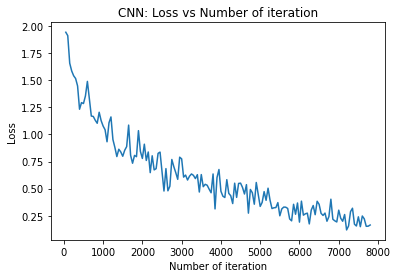

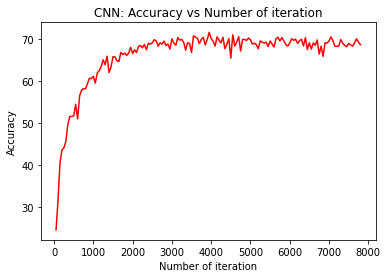

In [26]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()
  
# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()